In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

from visualize_graph_helpers import *

In [2]:
def func(x, y, ind):
    total = 0
    for pair in ind:
        i, j = pair[0], pair[1]
        first = 0.5*(np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2) - 1)**2
        second = 0.5*(min(np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2) - math.sqrt(3), 0)**2)
        
        total = total + first + second
    
    return total

In [3]:
def adam(func, forces, A, ind, kmax, tol=1e-6):
    # generate an initial point
    x = np.random.normal(0, 91, 91)
    y = np.random.normal(0, 91, 91)
    
    # parameters for Adam
    stepsize = 0.02
#     initial_stepsize = 0.02
    batchsize = 91
    m = np.zeros(182)
    v = np.zeros(182)
    epsilon = 1e-8
    b1 = 0.9 # factor for average gradient
    b2 = 0.999 # factor for average squared gradient
    
    # Set up the initial configuration
    gnorm = np.zeros((kmax, 1))
    fvals = np.zeros((kmax, 1))
    
    # start minimization
    f = func(x, y, ind)
    g = forces(x, y, A)
    norm_g = np.linalg.norm(g)
    print('Initially, f = {:.2f}, || g || = {:.2f}'.format(f, norm_g))
                 
    iter = 0
    # start Adam
    while norm_g > tol and iter < kmax:
        fvals[iter] = f
        gnorm[iter] = norm_g
        
        g_subset = forces(x, y, A)
        m = b1*m + (1-b1)*g_subset
        v = b2*v + (1-b2)*(g_subset)**2
        m_hat = m/(1-b1**(iter+1))
        v_hat = v/(1-b2**(iter+1))

#         stepsize = initial_stepsize * np.sqrt(1 - b2**(iter+1)) / (1 - b1**(iter+1))

        point = np.concatenate((x, y), axis=0) + (stepsize*m_hat/(np.sqrt(v_hat)+epsilon))
        x = point[:91]
        y = point[91:]
        
        f = func(x, y, ind)
        g = forces(x, y, A)
        norm_g = np.linalg.norm(g)

        if iter % 1000 == 0:
            print('iter = {}, f = {}, ||g|| = {}\n'.format(iter, fvals[iter], gnorm[iter]))

        iter = iter + 1;
        
    return x, y, fvals, gnorm

In [4]:
iter_max = 10**5

file_path = 'Adjacency_matrix.csv'
A = np.genfromtxt(file_path, delimiter=',')

A.shape

(91, 91)

In [5]:
# compute nonzero indexes in the adjacent matrix
nonzero_indices = np.nonzero(A)
ind = np.array(list(zip(nonzero_indices[0], nonzero_indices[1])))
ind.shape

(188, 2)

In [6]:
x, y, fvals, gnorm = adam(func, forces, A, ind, iter_max, tol=1e-6)

Initially, f = 3216450.52, || g || = 13.42
iter = 0, f = [3216450.5164787], ||g|| = [13.41994647]

iter = 1000, f = [2105733.47122606], ||g|| = [12.57517637]

iter = 2000, f = [1335947.65626547], ||g|| = [11.92045149]

iter = 3000, f = [825574.2270048], ||g|| = [11.00988013]

iter = 4000, f = [501923.47879497], ||g|| = [10.10273407]

iter = 5000, f = [298361.9500815], ||g|| = [8.95295468]

iter = 6000, f = [169204.4454211], ||g|| = [7.99574104]

iter = 7000, f = [91371.31683252], ||g|| = [6.82749144]

iter = 8000, f = [46073.0366677], ||g|| = [5.65666376]

iter = 9000, f = [22146.80547623], ||g|| = [4.95224907]

iter = 10000, f = [9475.51280995], ||g|| = [4.24284225]

iter = 11000, f = [3678.04109135], ||g|| = [3.4072572]

iter = 12000, f = [965.46908043], ||g|| = [2.35350592]

iter = 13000, f = [88.00539093], ||g|| = [1.63768218]

iter = 14000, f = [43.19651576], ||g|| = [0.13694304]

iter = 15000, f = [45.49693507], ||g|| = [0.03385486]

iter = 16000, f = [46.90212196], ||g|| = [0.01

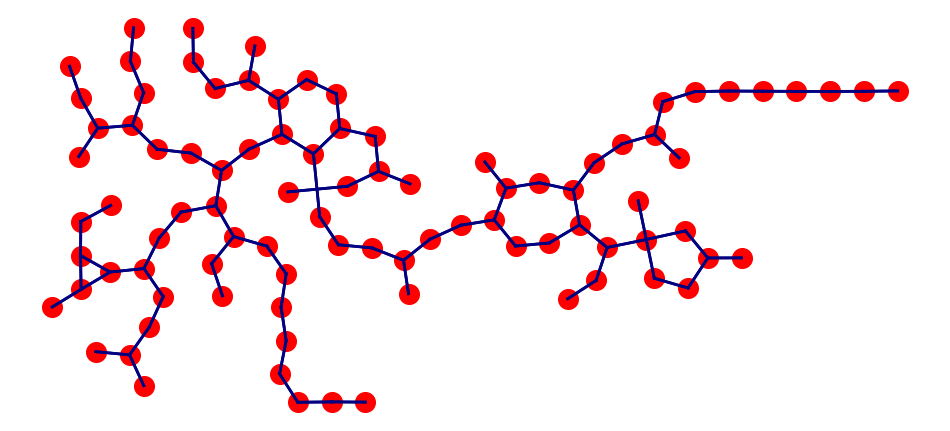

In [7]:
plot_graph(x,y,A)

<Figure size 800x1200 with 0 Axes>

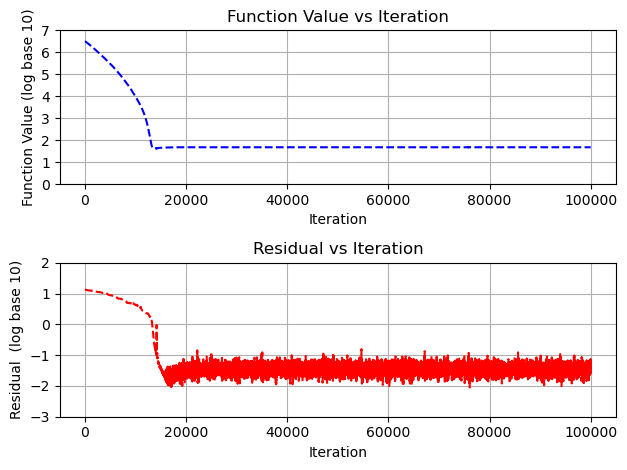

In [13]:
iterations = np.arange(iter_max)

plt.figure(figsize=(8, 12))
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(iterations, np.log10(fvals), 'b--', markersize=2)
ax1.grid()
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Function Value (log base 10)')
ax1.set_yticks(np.arange(8))
ax1.set_title('Function Value vs Iteration')

ax2.plot(iterations, np.log10(gnorm), 'r--', markersize=2)
ax2.grid()
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Residual  (log base 10)')
ax2.set_yticks(np.arange(-3, 3))
ax2.set_title('Residual vs Iteration')

fig.tight_layout()

plt.show()